In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider

In [2]:
# Params
freq_mhz = 1000  # MHz
freq = freq_mhz * 1e6  # Hz
c = 3e8
wavelength = c / freq # in meters
k = 2 * np.pi / wavelength
spacing = wavelength/2  # spacing in wavelengths; d = wavelength/2 (m)
beam_angle = 90 # degrees
n_ports = 10

# Ports dataset
ports = np.array(list(range(1,n_ports+1)))
rx_gain_db = np.zeros(n_ports)  # 0dB, unity gain through all elements 


In [3]:
# Gain, dB to linear
rx_gain_linear = 10 ** (rx_gain_db / 20)

# Port positions (linear array along x-axis)
port_positions_x = np.arange(len(ports)) - (len(ports)-1)/2

# Angle sweep for beam pattern
theta = np.linspace(0, np.pi, 1000)


In [4]:
# Array Factor Calculation
def af_calc(theta, beam_angle, freq_mhz, d):
    freq = freq_mhz * 1e6  # Hz
    c = 3e8
    wavelength = c / freq # in meters
    k = 2 * np.pi / wavelength
    beam_angle = beam_angle * np.pi/180 # conversion into raidans
    
    rx_phase_rad = np.zeros(n_ports)
    for i in range(n_ports):
        rx_phase_rad[i] = -i*k*d*np.cos(beam_angle)
    
    AF = np.zeros_like(theta, dtype=complex)
    for idx, x_pos in enumerate(port_positions_x):
        AF += rx_gain_linear[idx] * np.exp(1j *( k * d * x_pos * np.cos(theta) + rx_phase_rad[idx]))

    # Normalize
    AF_db = 20 * np.log10(np.abs(AF) / np.max(np.abs(AF)))
    return AF_db

AF_db = af_calc(theta, beam_angle, freq_mhz, spacing)
len(AF_db)

1000

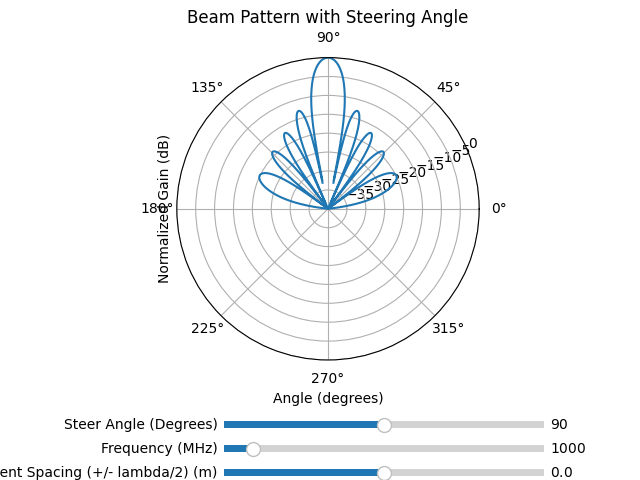

In [5]:
%matplotlib widget
# Set up polar plot
fig = plt.figure()
ax = plt.subplot(111, polar=True)
plt.subplots_adjust(bottom=0.25)

line, = ax.plot((theta), AF_db)
ax.set_title('Beam Pattern with Steering Angle')
ax.set_xlabel('Angle (degrees)')
ax.set_ylabel('Normalized Gain (dB)')
ax.set_ylim(-40, 0)
ax.grid(True)

slider_ax = fig.add_axes([0.35, 0.1, 0.5, 0.03])  # [left, bottom, width, height]
steer_slider = Slider(slider_ax, 'Steer Angle (Degrees)', 0, 180, valinit=90, valstep=0.5)

slider_bx = fig.add_axes([0.35, 0.05, 0.5, 0.03])  # [left, bottom, width, height]
freq_slider = Slider(slider_bx, 'Frequency (MHz)', 100, 10000, valinit=1000, valstep=100)

slider_cx = fig.add_axes([0.35, 0.0, 0.5, 0.03])
spacing_slider = Slider(slider_cx, 'Element Spacing (+/- lambda/2) (m)', -0.5, 0.5, valinit=0, valstep=0.05)


def update(val):
    angle = steer_slider.val
    freq_mhz = freq_slider.val
    offset = spacing_slider.val
    freq = freq_mhz * 1e6  # Hz
    c = 3e8
    wavelength = c / freq
    d = wavelength / 2 + offset
    line.set_ydata(af_calc(theta, angle, freq_mhz, d))
    fig.canvas.draw_idle()

steer_slider.on_changed(update)
freq_slider.on_changed(update)
spacing_slider.on_changed(update)

plt.show()